In [1]:
%matplotlib inline
import seaborn as sns
from IPython.core.pylabtools import figsize
figsize(14, 7)

In [2]:
import pandas as pd
import numpy as np
import pylab as py

In [76]:
cols = ['sentiment','id','date','query_string','user','text']
data = pd.read_csv("/data/datasets/social/twitter/sentiment140/training.1600000.processed.noemoticon.csv",
                   names=cols, header=None, encoding='latin1')
data = data.sample(500000)

In [77]:
data.head()

,sentiment,id,date,query_string,user,text
556315,0,2204251355,Wed Jun 17 01:43:26 PDT 2009,NO_QUERY,LadyGooner,"Bleugh I have a stomach bug, not good when you..."
1490928,4,2069005638,Sun Jun 07 15:05:35 PDT 2009,NO_QUERY,YeliBear,My life &gt; your life.
1462640,4,2064048625,Sun Jun 07 05:03:00 PDT 2009,NO_QUERY,syarif_m2e,@CarbonCopyBiB : I highly recommends you join ...
435593,0,2065461403,Sun Jun 07 08:38:37 PDT 2009,NO_QUERY,dannybanany,@Blazex3 holidays? ooh we had no holidays dam...
228645,0,1978306830,Sat May 30 22:58:55 PDT 2009,NO_QUERY,kixxa,@bheerfan I think SyFy killed my James! Does ...


In [78]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(
    data, 
    test_size=0.20,
    random_state=42
)

In [268]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), max_df=2.0/3.0, binary=True)
logit = LogisticRegression(class_weight='balanced', C=0.1)
model = Pipeline([('tfidf', tfidf), ('logit', logit)])

In [269]:
model.fit(data_train.text, data_train.sentiment)
model.score(data_test.text, data_test.sentiment)

0.7962

In [272]:
steps = dict(model.get_params()['steps'])
vocabulary = steps['tfidf'].vocabulary_
coef = steps['logit'].coef_
word_importance = [(word, coef[0, idx]) for word, idx in vocabulary.items()]
word_importance.sort(key=lambda x: x[1])
print("Most important words for +:", word_importance[-10:])
print("Most important words for -:", word_importance[:10])

Most important words for +: [('you', 3.004132145265498), ('nice', 3.1222058394731045), ('great', 3.1434939922868272), ('glad', 3.278336660181925), ('yay', 3.431122391118869), ('awesome', 3.568674081508413), ('good', 3.7658594753668866), ('love', 3.794441162599605), ('happy', 3.904025259523036), ('thanks', 4.443269680301213)]
Most important words for -: [('sad', -8.590006182583549), ('miss', -6.442455324906493), ('sick', -5.039256566991811), ('poor', -4.797896853101612), ('wish', -4.722988695612713), ('hate', -4.583896798510339), ('sucks', -4.553598764263066), ('sorry', -4.4736597370477424), ('missing', -4.427262223387092), ('not', -4.167816560124094)]


In [193]:
data_claritin = pd.read_csv("/data/datasets/social/twitter/claritin_twitter/claritin_october_twitter.csv",
                            encoding='latin1')

# only look at male/female (disregard the "brand" designator)
data_claritin.dropna(subset=['sentiment', 'gender'], inplace=True)
data_claritin = data_claritin.query('gender in ("male", "female")')
data_claritin['gender'] = data_claritin.gender.astype('category')

# re-normalize this dataset's sentiment classification by disregarding
# neutral and having positive be 0 and negative be 4
data_claritin = data_claritin[data_claritin.sentiment != 3]
data_claritin['sentiment'] = (data_claritin.sentiment > 3) * 4

# rename tweet text field to 'text' instead of 'content'
data_claritin.rename(columns={'content': 'text'}, inplace=True)

print("Number of samples:", data_claritin.shape[0])

Number of samples: 2925


In [194]:
data_claritin.head()

,interaction.id,article_url,text,time,relevant,sentiment,gender,dizziness,convulsions,heart palpitations,shortness of breathe,headaches,drug effect decreased,allergies worse after taking drug,bad interaction between claritin and another drug.,nausea (made the person nauseous),caused insomnia (the person wasn't able to sleep)
7,1e21a5b0d2dfad00e074a6ced450fa86,http://twitter.com/SoulPunk5eva/statuses/25947...,Is there something you eat every day? Ûª_Ûª_...,"Sat, 20 Oct 2012 02:08:34 +0000",yes,4,male,no,no,no,no,no,no,no,no,no,no
10,1e211b745aa1ad00e074d23de7a27a16,http://twitter.com/OwlsAreLove/statuses/255491...,spookclub: yeah i totally want the d. the clar...,"Tue, 09 Oct 2012 02:16:02 +0000",yes,4,female,no,no,no,no,no,no,no,no,no,no
17,1e20ff3d801ca380e074ca38ec9f80a4,http://twitter.com/thefunkylobster/statuses/25...,spookclub: yeah i totally want the d. the clar...,"Sat, 06 Oct 2012 20:24:35 +0000",yes,4,male,no,no,no,no,no,no,no,no,no,no
55,1e2174ebc628af80e074cbfaa8933246,http://twitter.com/lollipopscards/statuses/258...,"well, wholeliving mag this makes for a strange...","Tue, 16 Oct 2012 05:02:51 +0000",yes,0,female,no,no,no,no,no,no,no,no,no,no
56,1e2174fc9cc4a980e074ff06c5e66b1a,http://twitter.com/traviseckstein/statuses/258...,"She wants the Claritin, D. http://t.co/5LjLA2yi","Tue, 16 Oct 2012 05:10:23 +0000",yes,4,male,no,no,no,no,no,no,no,no,no,no


In [195]:
# balance the claritin dataset between gender and sentiment
def balance_column(df, column):
    g = df.groupby(column)
    min_group = g.size().min()
    return g.apply(lambda x: x.sample(min_group)).reset_index(drop=True)
data_claritin = balance_column(data_claritin, ['sentiment', 'gender'])

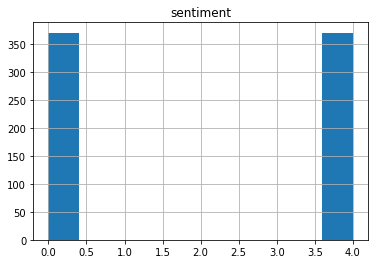

In [196]:
data_claritin.hist('sentiment');

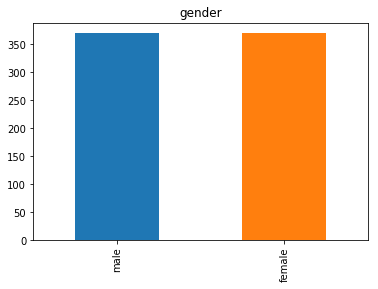

In [197]:
data_claritin.gender.value_counts().plot(kind='bar')
py.title("gender");

In [198]:
model.score(data_claritin.text, data_claritin.sentiment)

0.654054054054054

In [199]:
from scipy.stats import pearsonr
def sentiment_correlation(model, data):
    return model.score(data.text, data.sentiment)
    pred = model.predict(data.text)
    corr = pearsonr(data.sentiment, pred)[0]
    return corr

In [200]:
female = data_claritin.gender == 'female'
male = data_claritin.gender == 'male'

print("Original Data:", sentiment_correlation(model, data_test))
print("All Data:", sentiment_correlation(model, data_claritin))
print("Female:", sentiment_correlation(model, data_claritin[female]))
print("Male:", sentiment_correlation(model, data_claritin[male]))

Original Data: 0.79622
All Data: 0.654054054054054
Female: 0.6783783783783783
Male: 0.6297297297297297
